#### Importing libraries for the wine quality prediction


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings;
warnings.filterwarnings('ignore');

#### Reading the csv file

In [2]:
wine=pd.read_csv('QualityPrediction.csv')

In [3]:
wine.shape
#the dataset has 1599 rows and 12 features.

(1599, 12)

In [4]:
#first 10 rows
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


#### Finding the information of the dataset

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


##### The dataset contains all the independent variables as float except the variable 'quality' which is integer and will be our target variable.

#### Descriptive statistics of the data

In [6]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


##### Looking at the data we can see a huge difference between 50% and maximum values of 'residual sugar','free sulfur dioxide' 'total sulphur dioxide'. Also, mean is greater than median for most of the variables except density indicating that the distribution of those variables is positively skewed.

## Preprocessing
#### Checking for null values

In [7]:
wine.isnull().sum()
#No null values in the dataset

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### Can also plot the heat map to confirm the null values.

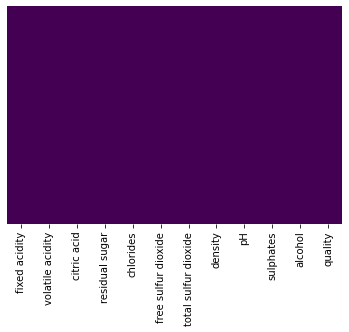

In [8]:
sns.heatmap(wine.isnull(),yticklabels=False,cbar=False,cmap='viridis');

##### To understand the relation or the inter dependencies between the variables we need to plot the heatmap and check for the correlations between the variables.

<AxesSubplot:>

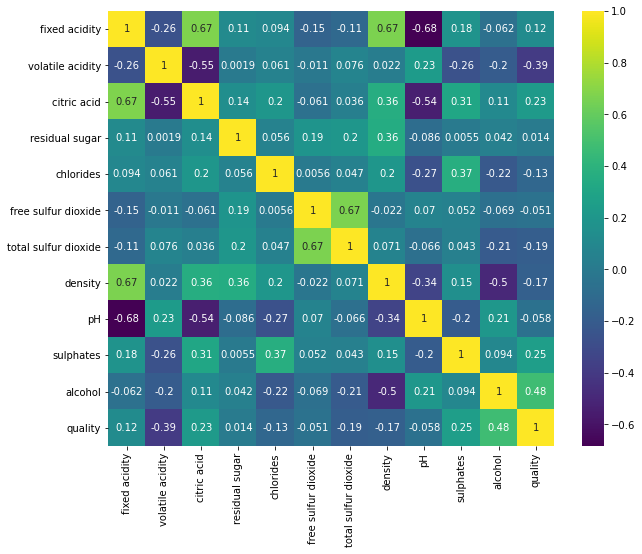

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(wine.corr(), annot = True, cmap = 'viridis')

##### From the heatmap we can infer that the quality of wine is positively correlated with alcohol content and the sulphates.
On the other hand, volatile acidity has a negative correlation with the quality. A bit more research showed that, Volatile acidity is made from compounds in types of acid found in wine, showing an aroma, rather than found on the palate. Although the presence of high amounts of VA is considered undesirable, in some cases a touch of volatility is no bad thing.



#### We can deep dive deeper into the visualisations to check the dependencies between the independent variables and the target variable.

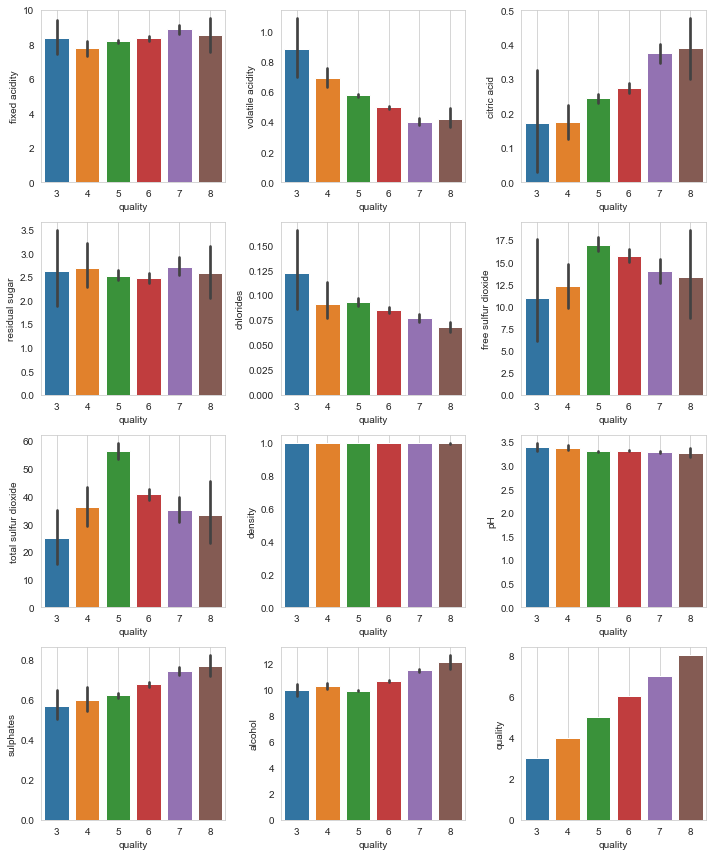

In [10]:
plt.figure(figsize=(10,12))
sns.set_style("whitegrid")
 
for i, col in enumerate(list(wine.columns.values)):
  plt.subplot(4,3,i+1)
  sns.barplot(wine.quality, y=wine[col], data=wine)
  plt.grid()
  plt.tight_layout()



#### From the above bar charts we can conclude the following:
Positive correlation between fixed acidity, citric acid, residual sugar, sulphates and alcohol  with the quality of fine.
Negative correlation between volatile acidity, chlorides, free sulfur dioxide, total sulfur dioxide, density and ph with the quality of wine.
pH has a negative correlation with the fixed acidity,citric acid, density in comparison to alcohol and volatile acid where it has positive correlation.From the heat map we can conclude that there is a 0.67 correlation between 'total sulfur dioxide' and 'free sulfur dioxide'. We delete the column 'total sulphur dioxide' to avoid multicollinearity.

In [11]:
wine.drop(['free sulfur dioxide'],axis=1,inplace=True)

#### We can now plot the distribution of the independent variables.

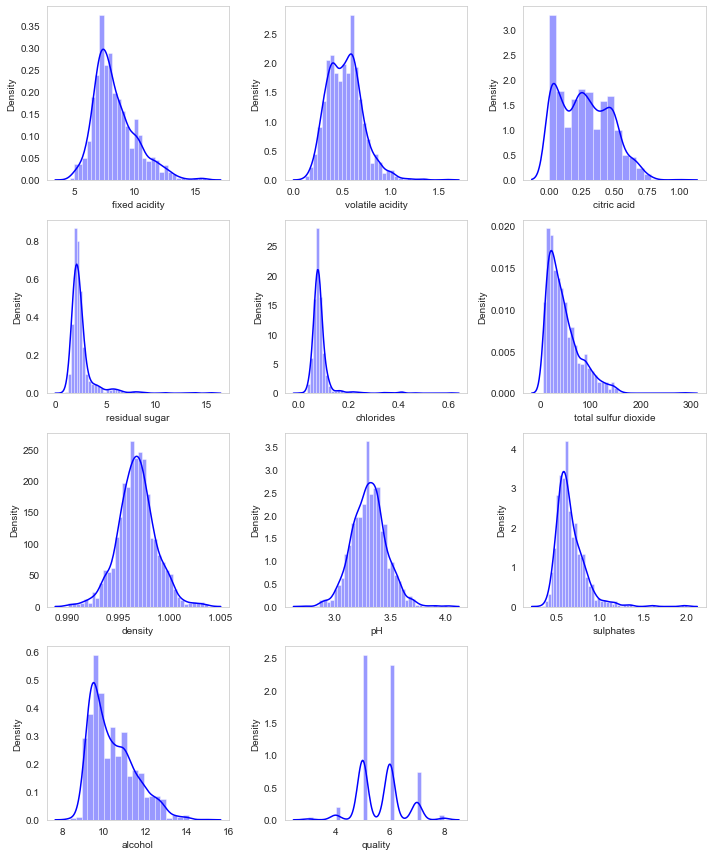

In [12]:
plt.figure(figsize=(10,12))
for i, col in enumerate(list(wine.columns.values)):
  plt.subplot(4,3,i+1)
  sns.distplot(wine[col],color='b',kde=True, label='wine')
  plt.grid()
  plt.tight_layout()


#### From the above plote we can infer that Density and pH are almost normally distributed whereas others are skewed positively.   

#### Checking for outliers

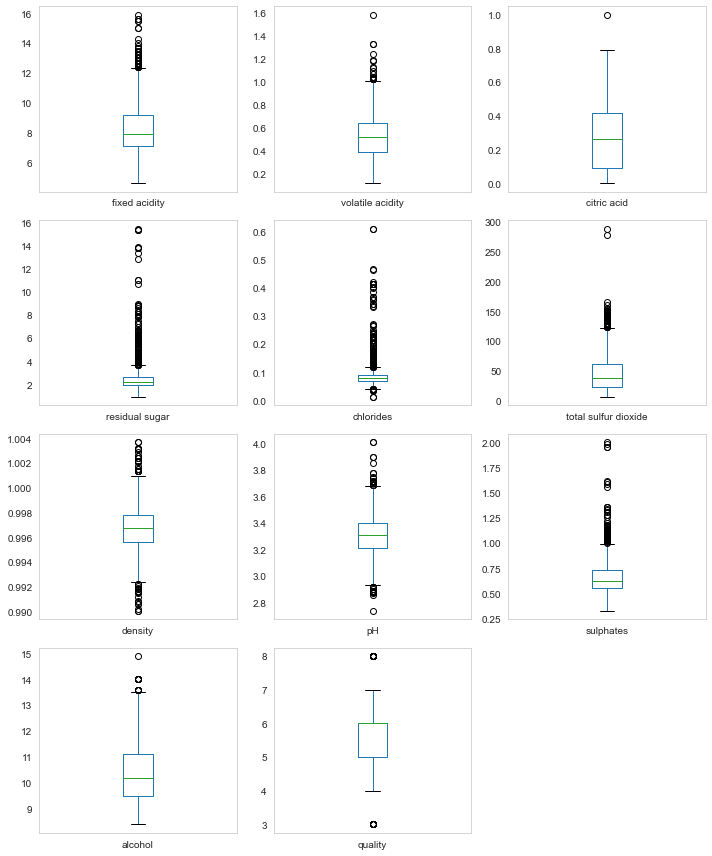

In [13]:
plt.figure(figsize=(10,12))
for i, col in enumerate(list(wine.columns.values)):
  plt.subplot(4,3,i+1)
  wine.boxplot(col)
  plt.grid()
  plt.tight_layout()

#### All the features have outlier values. We need to treate them before creating our model. We are using median to impute the outlier values.

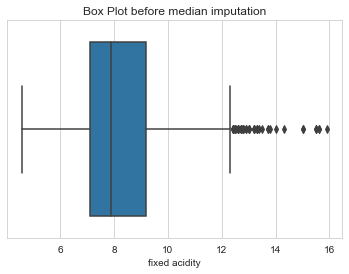

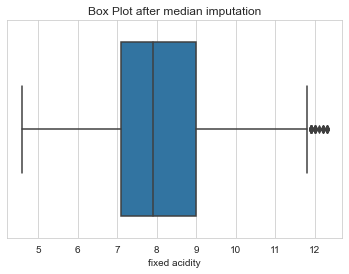

In [14]:
sns.boxplot(wine['fixed acidity'])
plt.title("Box Plot before median imputation")
plt.show()
q1 = wine['fixed acidity'].quantile(0.25)
q3 = wine['fixed acidity'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(wine['fixed acidity'])
for i in wine['fixed acidity']:
    if i > Upper_tail or i < Lower_tail:
            wine['fixed acidity'] = wine['fixed acidity'].replace(i, med)
sns.boxplot(wine['fixed acidity'])
plt.title("Box Plot after median imputation")
plt.show()            


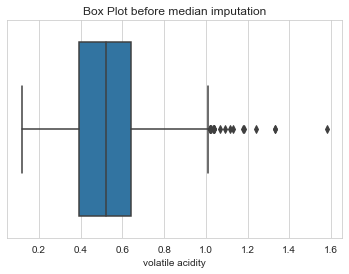

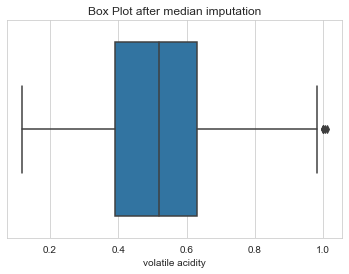

In [15]:
sns.boxplot(wine['volatile acidity'])
plt.title("Box Plot before median imputation")
plt.show()
q1 = wine['volatile acidity'].quantile(0.25)
q3 = wine['volatile acidity'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(wine['volatile acidity'])
for i in wine['volatile acidity']:
    if i > Upper_tail or i < Lower_tail:
            wine['volatile acidity'] = wine['volatile acidity'].replace(i, med)
sns.boxplot(wine['volatile acidity'])
plt.title("Box Plot after median imputation")
plt.show()            


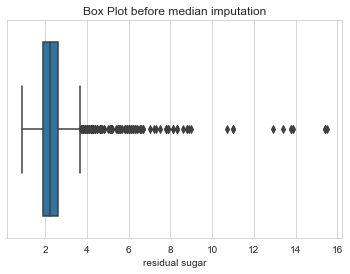

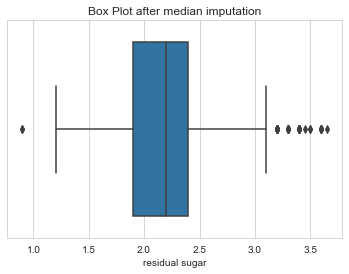

In [16]:
sns.boxplot(wine['residual sugar'])
plt.title("Box Plot before median imputation")
plt.show()
q1 = wine['residual sugar'].quantile(0.25)
q3 = wine['residual sugar'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(wine['residual sugar'])
for i in wine['residual sugar']:
    if i > Upper_tail or i < Lower_tail:
            wine['residual sugar'] = wine['residual sugar'].replace(i, med)
sns.boxplot(wine['residual sugar'])
plt.title("Box Plot after median imputation")
plt.show()            


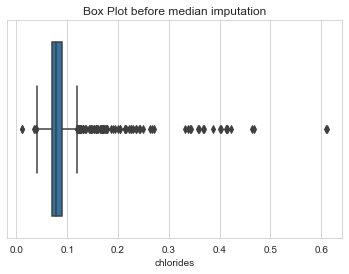

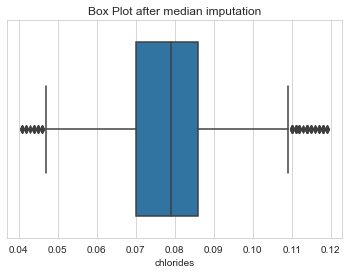

In [17]:
sns.boxplot(wine['chlorides'])
plt.title("Box Plot before median imputation")
plt.show()
q1 = wine['chlorides'].quantile(0.25)
q3 = wine['chlorides'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(wine['chlorides'])
for i in wine['chlorides']:
    if i > Upper_tail or i < Lower_tail:
            wine['chlorides'] = wine['chlorides'].replace(i, med)
sns.boxplot(wine['chlorides'])
plt.title("Box Plot after median imputation")
plt.show()            

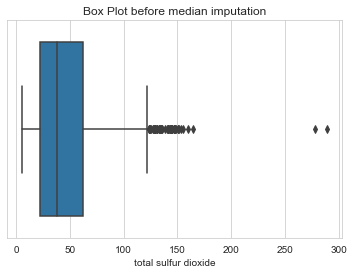

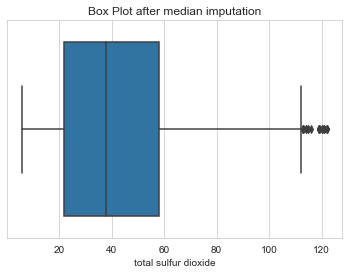

In [18]:
sns.boxplot(wine['total sulfur dioxide'])
plt.title("Box Plot before median imputation")
plt.show()
q1 = wine['total sulfur dioxide'].quantile(0.25)
q3 = wine['total sulfur dioxide'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(wine['total sulfur dioxide'])
for i in wine['total sulfur dioxide']:
    if i > Upper_tail or i < Lower_tail:
            wine['total sulfur dioxide'] = wine['total sulfur dioxide'].replace(i, med)
sns.boxplot(wine['total sulfur dioxide'])
plt.title("Box Plot after median imputation")
plt.show()       

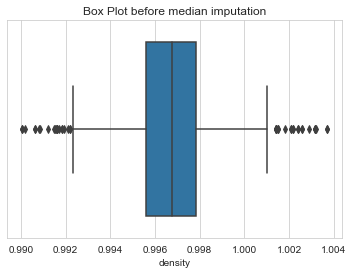

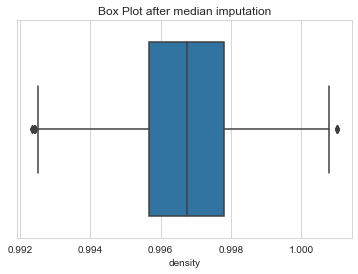

In [19]:
sns.boxplot(wine['density'])
plt.title("Box Plot before median imputation")
plt.show()
q1 = wine['density'].quantile(0.25)
q3 = wine['density'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(wine['density'])
for i in wine['density']:
    if i > Upper_tail or i < Lower_tail:
            wine['density'] = wine['density'].replace(i, med)
sns.boxplot(wine['density'])
plt.title("Box Plot after median imputation")
plt.show()       

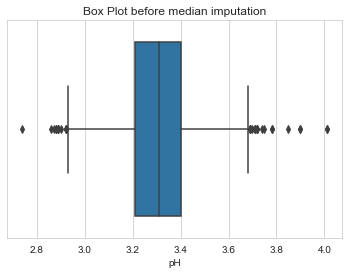

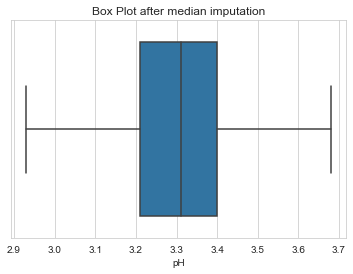

In [20]:
sns.boxplot(wine['pH'])
plt.title("Box Plot before median imputation")
plt.show()
q1 = wine['pH'].quantile(0.25)
q3 = wine['pH'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(wine['pH'])
for i in wine['pH']:
    if i > Upper_tail or i < Lower_tail:
            wine['pH'] = wine['pH'].replace(i, med)
sns.boxplot(wine['pH'])
plt.title("Box Plot after median imputation")
plt.show()       

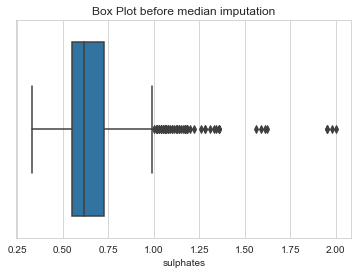

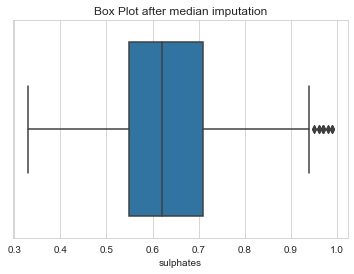

In [21]:
sns.boxplot(wine['sulphates'])
plt.title("Box Plot before median imputation")
plt.show()
q1 = wine['sulphates'].quantile(0.25)
q3 = wine['sulphates'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(wine['sulphates'])
for i in wine['sulphates']:
    if i > Upper_tail or i < Lower_tail:
            wine['sulphates'] = wine['sulphates'].replace(i, med)
sns.boxplot(wine['sulphates'])
plt.title("Box Plot after median imputation")
plt.show()       

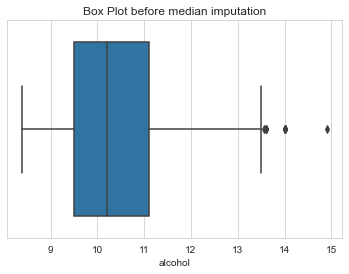

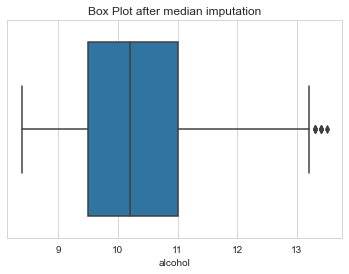

In [22]:
sns.boxplot(wine['alcohol'])
plt.title("Box Plot before median imputation")
plt.show()
q1 = wine['alcohol'].quantile(0.25)
q3 = wine['alcohol'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(wine['alcohol'])
for i in wine['alcohol']:
    if i > Upper_tail or i < Lower_tail:
            wine['alcohol'] = wine['alcohol'].replace(i, med)
sns.boxplot(wine['alcohol'])
plt.title("Box Plot after median imputation")
plt.show()       

#### Boxplots after outlier imputation

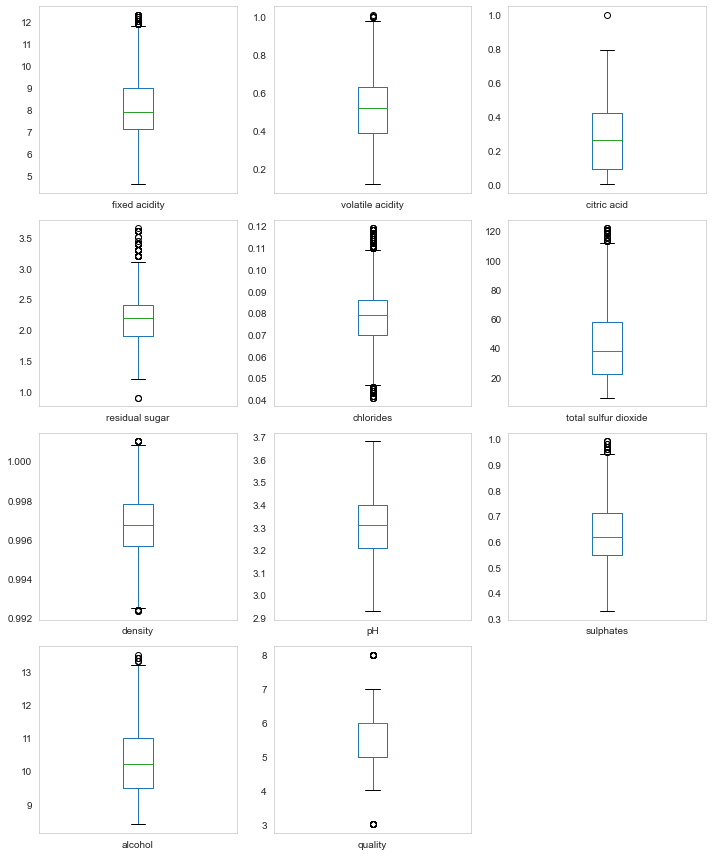

In [23]:
plt.figure(figsize=(10,12))
for i, col in enumerate(list(wine.columns.values)):
  plt.subplot(4,3,i+1)
  wine.boxplot(col)
  plt.grid()
  plt.tight_layout()


In [24]:
#sns.pairplot(wine, diag_kind = 'kde' , corner = True, hue='quality')

Our target variable is quality but it is labelled in classes 3,4,5,6,7,8. We need to change it to a binary variable for  our classification problems. The approach that I have taken here is: If the quality score of wine is greater than 7 then I will label it as a good quality wine (labelled as 1) and if the quality score is less than 7 then it is a bad quality wine (labelled as 0)

In [25]:
wine['quality'].value_counts().sort_values(ascending=False)

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [26]:
wine['quality_new'] = [ 1 if x>=7 else 0 for x in wine['quality']] 
wine['quality_new'].value_counts()

0    1382
1     217
Name: quality_new, dtype: int64

#### 'quality_new' column contains 217 'good quality wines' and 1382 'bad quality wines'

<AxesSubplot:xlabel='quality_new', ylabel='count'>

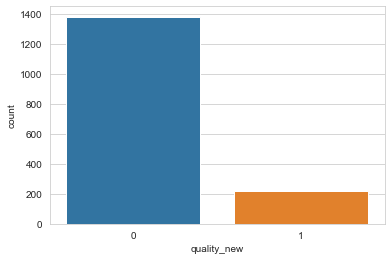

In [27]:
sns.countplot(x='quality_new', data=wine)

##### Dropping the quality column as its not needed in the dataset

In [28]:
wine.drop(['quality'],axis=1,inplace=True)

In [29]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality_new
0,7.4,0.70,0.00,1.9,0.076,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,34.0,0.9978,3.51,0.56,9.4,0


##### Standardizing of features: 
We are standardizing our data such that the transformed data has a mean of 0 and a standard deviation of 1.
Scaling the features brings everything into perspective. The features are now more comparable and will have a similar effect on the learning models.We will be scaling our variables for logistic regression and KNN algorithm, but for other models like decision
tree and random forest, scaling is not needed.

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(wine.drop('quality_new',axis=1))
scaled_features

array([[-0.50625721,  1.08407189, -1.39147228, ...,  1.44844849,
        -0.63860114, -0.97612532],
       [-0.23787585,  2.17144952, -1.39147228, ..., -0.78324812,
         0.37224514, -0.58284261],
       [-0.23787585,  1.4465311 , -1.18607043, ..., -0.35130684,
         0.11953357, -0.58284261],
       ...,
       [-1.24430596, -0.0637156 , -0.72391627, ...,  0.80053657,
         0.96190547,  0.59700554],
       [-1.51268732,  0.75181762, -0.77526673, ...,  1.88038977,
         0.62495671, -0.18955989],
       [-1.44559198, -1.27191296,  1.02199944, ...,  0.58456593,
         0.20377076,  0.59700554]])

##### All the features are scaled, and obtained as an array, it is important to convert it to a DataFrame again

In [31]:
#df.columns[:-1] means all but last column, it is same as df.column[0:10]

wine_feat = pd.DataFrame(scaled_features,columns=wine.columns[:-1])     
wine_feat.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.506257,1.084072,-1.391472,-0.660402,-0.193503,-0.329932,0.648369,1.448448,-0.638601,-0.976125
1,-0.237876,2.171450,-1.391472,0.980050,1.341692,0.903736,0.039563,-0.783248,0.372245,-0.582843
2,-0.237876,1.446531,-1.186070,0.276999,0.923002,0.417746,0.161324,-0.351307,0.119534,-0.582843
3,2.043366,-1.453143,1.484154,-0.660402,-0.263285,0.642049,0.770130,-1.071209,-0.470127,-0.582843
4,-0.506257,1.084072,-1.391472,-0.660402,-0.193503,-0.329932,0.648369,1.448448,-0.638601,-0.976125


##### We can plot a pairplot plot to visualise the pairwise relationships in the wine dataset.

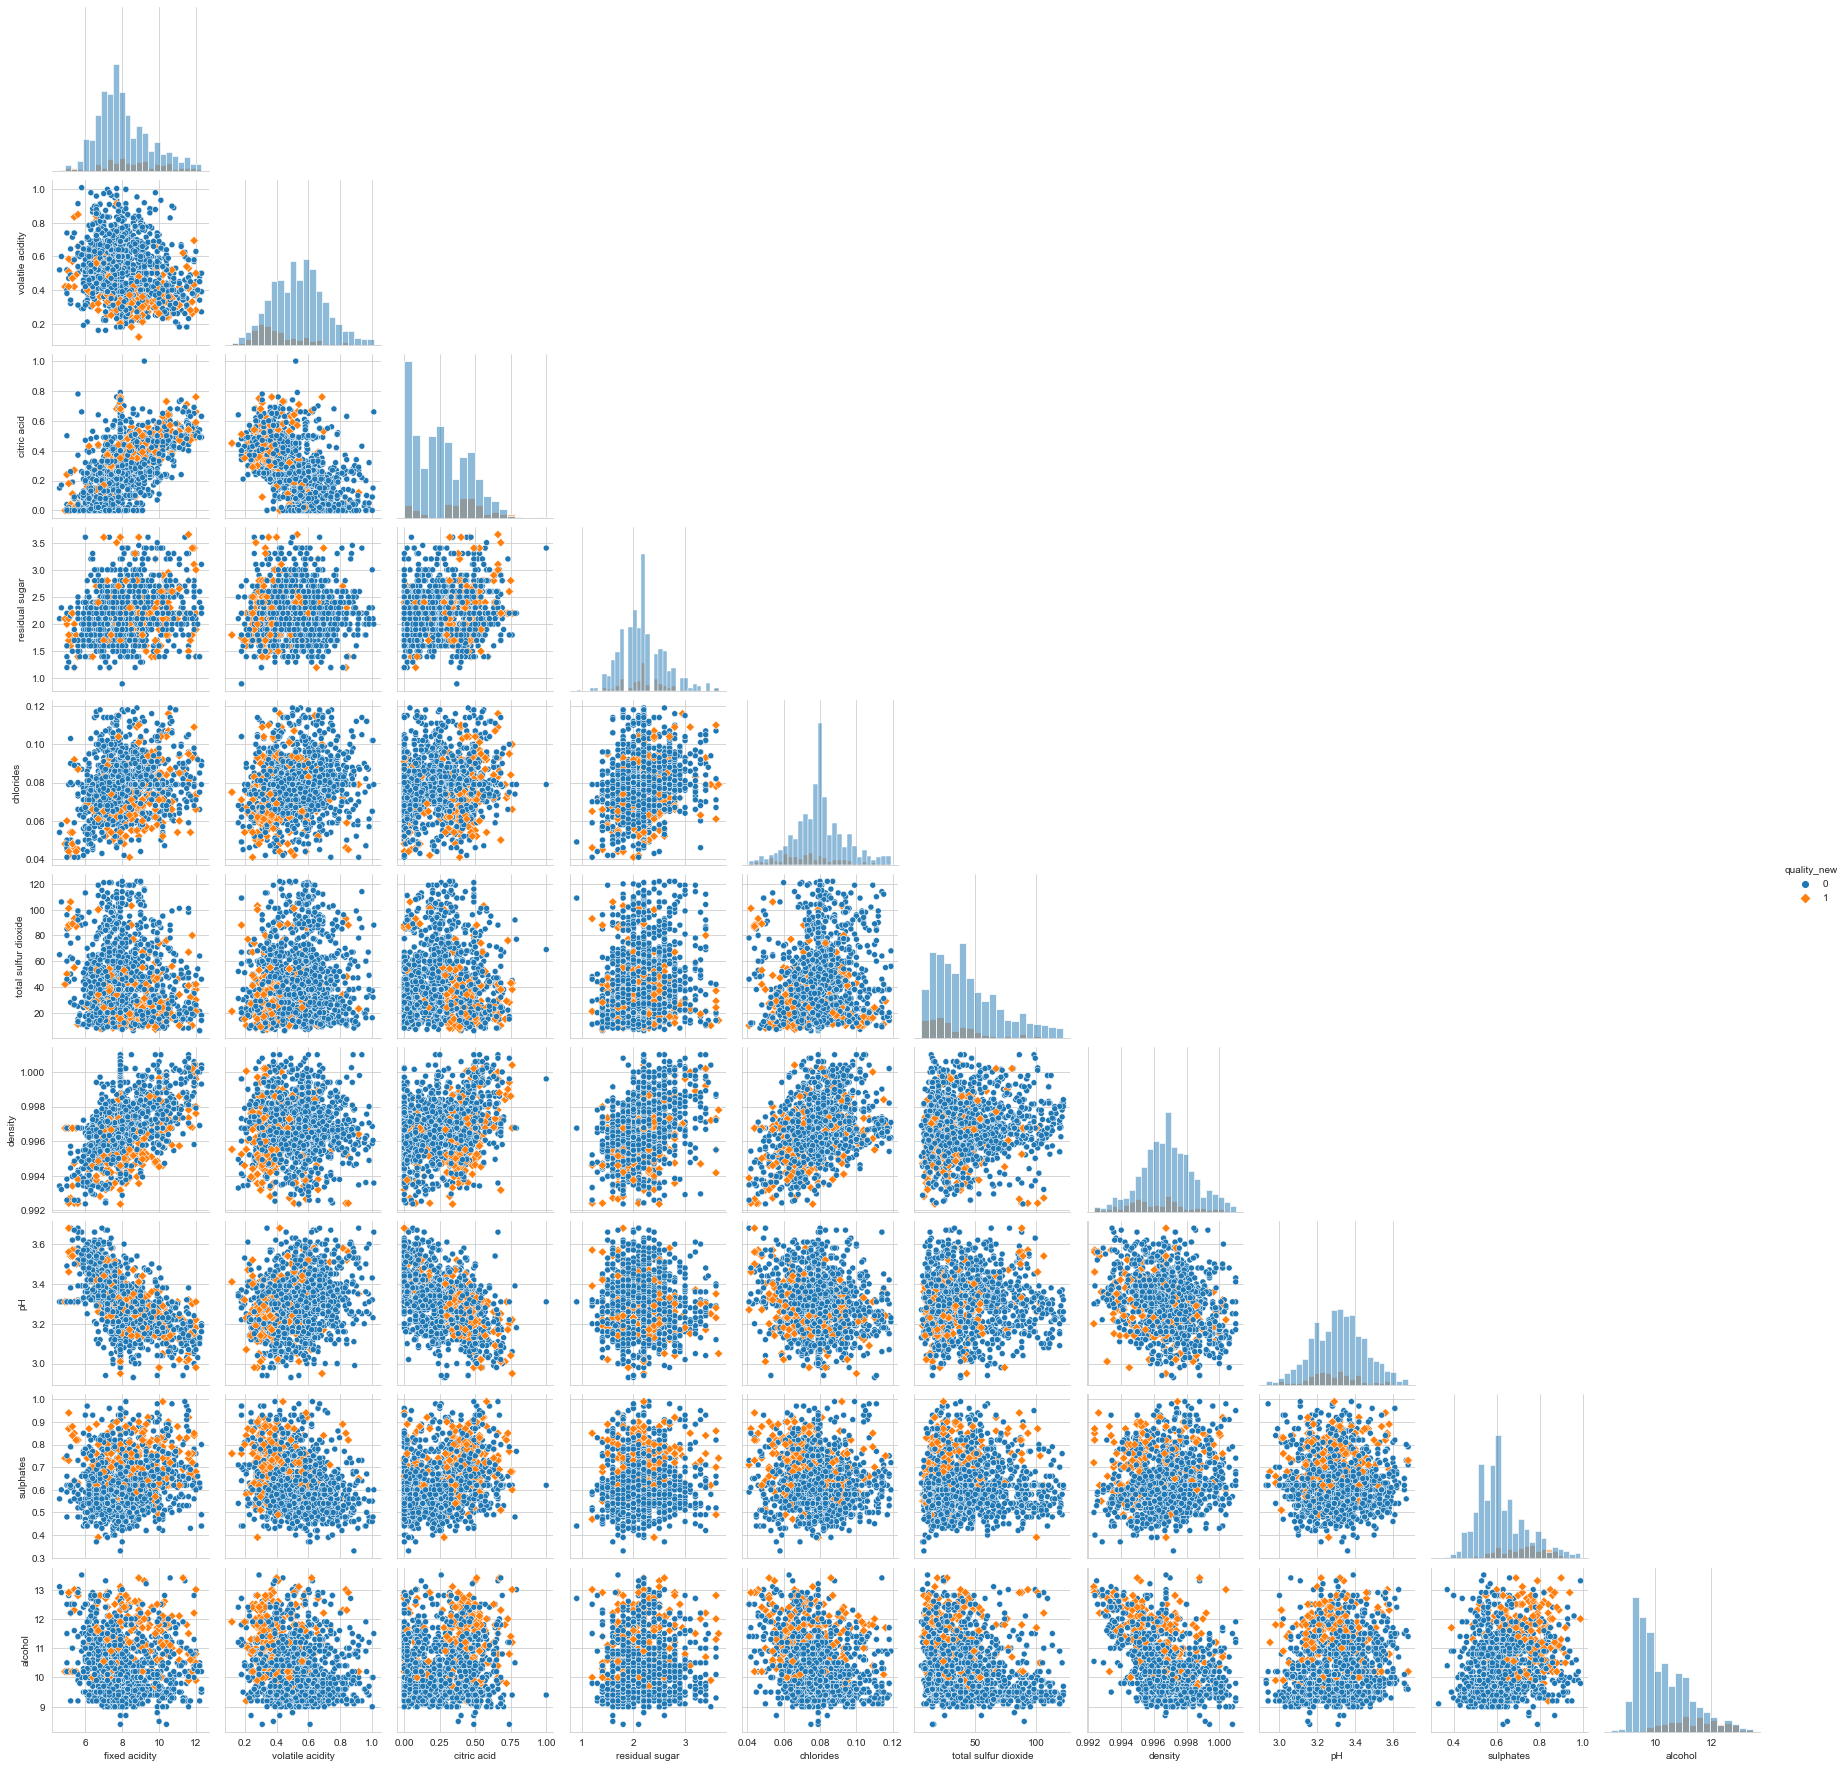

In [32]:
sns.color_palette("Set2")
sns.pairplot(wine,hue='quality_new', markers = ['o' , 'D'], diag_kind = 'hist' , corner = True)

#### From the above pairplot we can infer that, alcohol, sulfur dioxide and citric acid have positively skewed distribution and most of the other features have almost normal distribution.

# Modelling

#### For this project, I will be working on four different machine learning models: logistic regression, decision trees, random forests and KNN. For the purpose of this project, I will be comapring these models by their accuracy and Area under curve (AUC).

### Logistic Regression
#### The target variable is a categorical variable so we will apply the model of Logistic Regression. We need to split the data into train and test.

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X=wine_feat  # X contains the scaled features.
y=wine['quality_new']

In [35]:
print(X.shape)
print(y.shape)

(1599, 10)
(1599,)


In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=32)

In [37]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1066, 10)
(1066,)
(533, 10)
(533,)


#### Instantiating and fitting the model to training Dataset

In [38]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(random_state=0)
log_reg.fit(X_train,y_train)

LogisticRegression(random_state=0)

#### Prediction for Test dataset

In [39]:
y_pred=log_reg.predict(X_test)

In [40]:
y_test

348     0
423     1
851     0
754     0
1260    0
       ..
1048    0
1178    0
1568    0
621     0
730     0
Name: quality_new, Length: 533, dtype: int64

In [41]:
difference = pd.DataFrame(y_test - y_pred)
difference.value_counts()

quality_new
 0             468
 1              49
-1              16
dtype: int64

#### Confusion Matrix 

In [42]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix  

array([[442,  16],
       [ 49,  26]], dtype=int64)

Confusion Matrix helps us to compare the quantity of predicted values against each actual value. For example, for the Logistic Regression, we see that out of the testing sample, 26 wines were correctly classified as having good quality(TP). 442  wines were correctly classified as having bad quality(TN). However, there were also 49 good quality wines that were predicted as having bad quality(FN), and 16 bad quality wines that were predicted as having good quality(FP)

##### Matching the calclations ###
Accuracy=(TP + TN )/ Total=(26+442)/533=88%  

Precision=(TP / Total predicted positive)=26/42=62%

Recall=(TP / Total actual positves)=26/75=35%

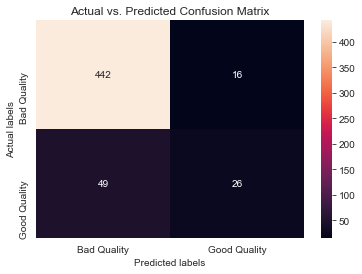

In [43]:
ax= plt.subplot()
sns.heatmap(conf_matrix ,annot=True, ax= ax, fmt='')

ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_title('Actual vs. Predicted Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Bad Quality','Good Quality']); ax.yaxis.set_ticklabels(['Bad Quality','Good Quality']);

plt.show()

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       458
           1       0.62      0.35      0.44        75

    accuracy                           0.88       533
   macro avg       0.76      0.66      0.69       533
weighted avg       0.86      0.88      0.86       533



In [45]:
#Predict_proba returns the probability of 0 and 1, since we slice [::,1] this implies we only take the probability of 1
y_pred_proba = log_reg.predict_proba(X_test)

#### Accuracy score
ROC curves are very helpful when understanding the balance between true-positive rate and false positive rates. Sci-kit learn has built in functions for ROC curves and for analyzing them. The inputs to these functions (roc_curve and roc_auc_score) are the actual labels and the predicted probabilities (not the predicted labels). 

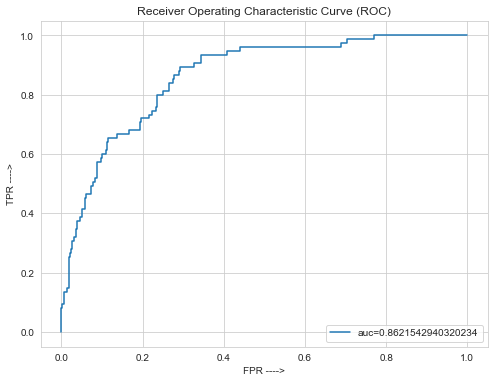

In [46]:
from sklearn import metrics

y_pred_proba = log_reg.predict_proba(X_test)[::,1]    #[0.25 to be labeled as 0, 0.75 to be labeld as 1]   

# metrics.roc_curve returns three outputs: fpr, tpr and different thresholds
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)

#metrics.roc_auc_score directly returns the auc for y_actual and corresponding prob values of success for each row
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Plotting the AUC curve
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()

In [47]:
auc = metrics.roc_auc_score(y_test, y_pred_proba)     #returns the single auc value
auc

0.8621542940320234

The performance metric that I have chosen here is the Accuracy score which is 88% and Area under the curve is 86%.So far, Logistic Regression model has given us a good score. We will see how the other models perform.

### Decision Tree classifier
Decision trees are a popular model which can be used to visually and explicitly represent decisions and decision making. For Decision trees and Random forest there is no need to do scaling

In [48]:
from sklearn.tree import DecisionTreeClassifier     

In [49]:
X = wine.drop('quality_new',axis=1)
y=wine['quality_new']

#### Train test split

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=32)

##### Instantiating the DecisionTreeClassifer model, with a fixed random state and max_depth

In [51]:
model=DecisionTreeClassifier(random_state=32,max_depth=5)    #constraint

In [52]:
# fit the DecisionTreeClassifeir model on the train dataset

dt=model.fit(X_train,y_train)

#Predict the output variable value for the X test dataset

y_pred=dt.predict(X_test)

In [53]:
y_pred_proba = dt.predict_proba(X_test)[::,1]    #[0.25 to be labeled as 0, 0.75 to be labeld as 1]   

#### Model evaluation

In [54]:
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[431,  27],
       [ 44,  31]], dtype=int64)

<AxesSubplot:>

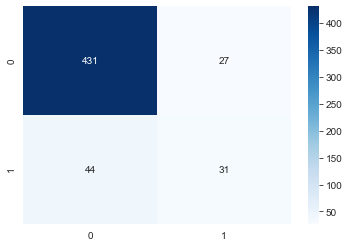

In [55]:
sns.heatmap(conf_matrix, annot = True, cmap="Blues", fmt='')

#### Classification report

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       458
           1       0.53      0.41      0.47        75

    accuracy                           0.87       533
   macro avg       0.72      0.68      0.70       533
weighted avg       0.85      0.87      0.86       533



#### Plotting the Decision Tree

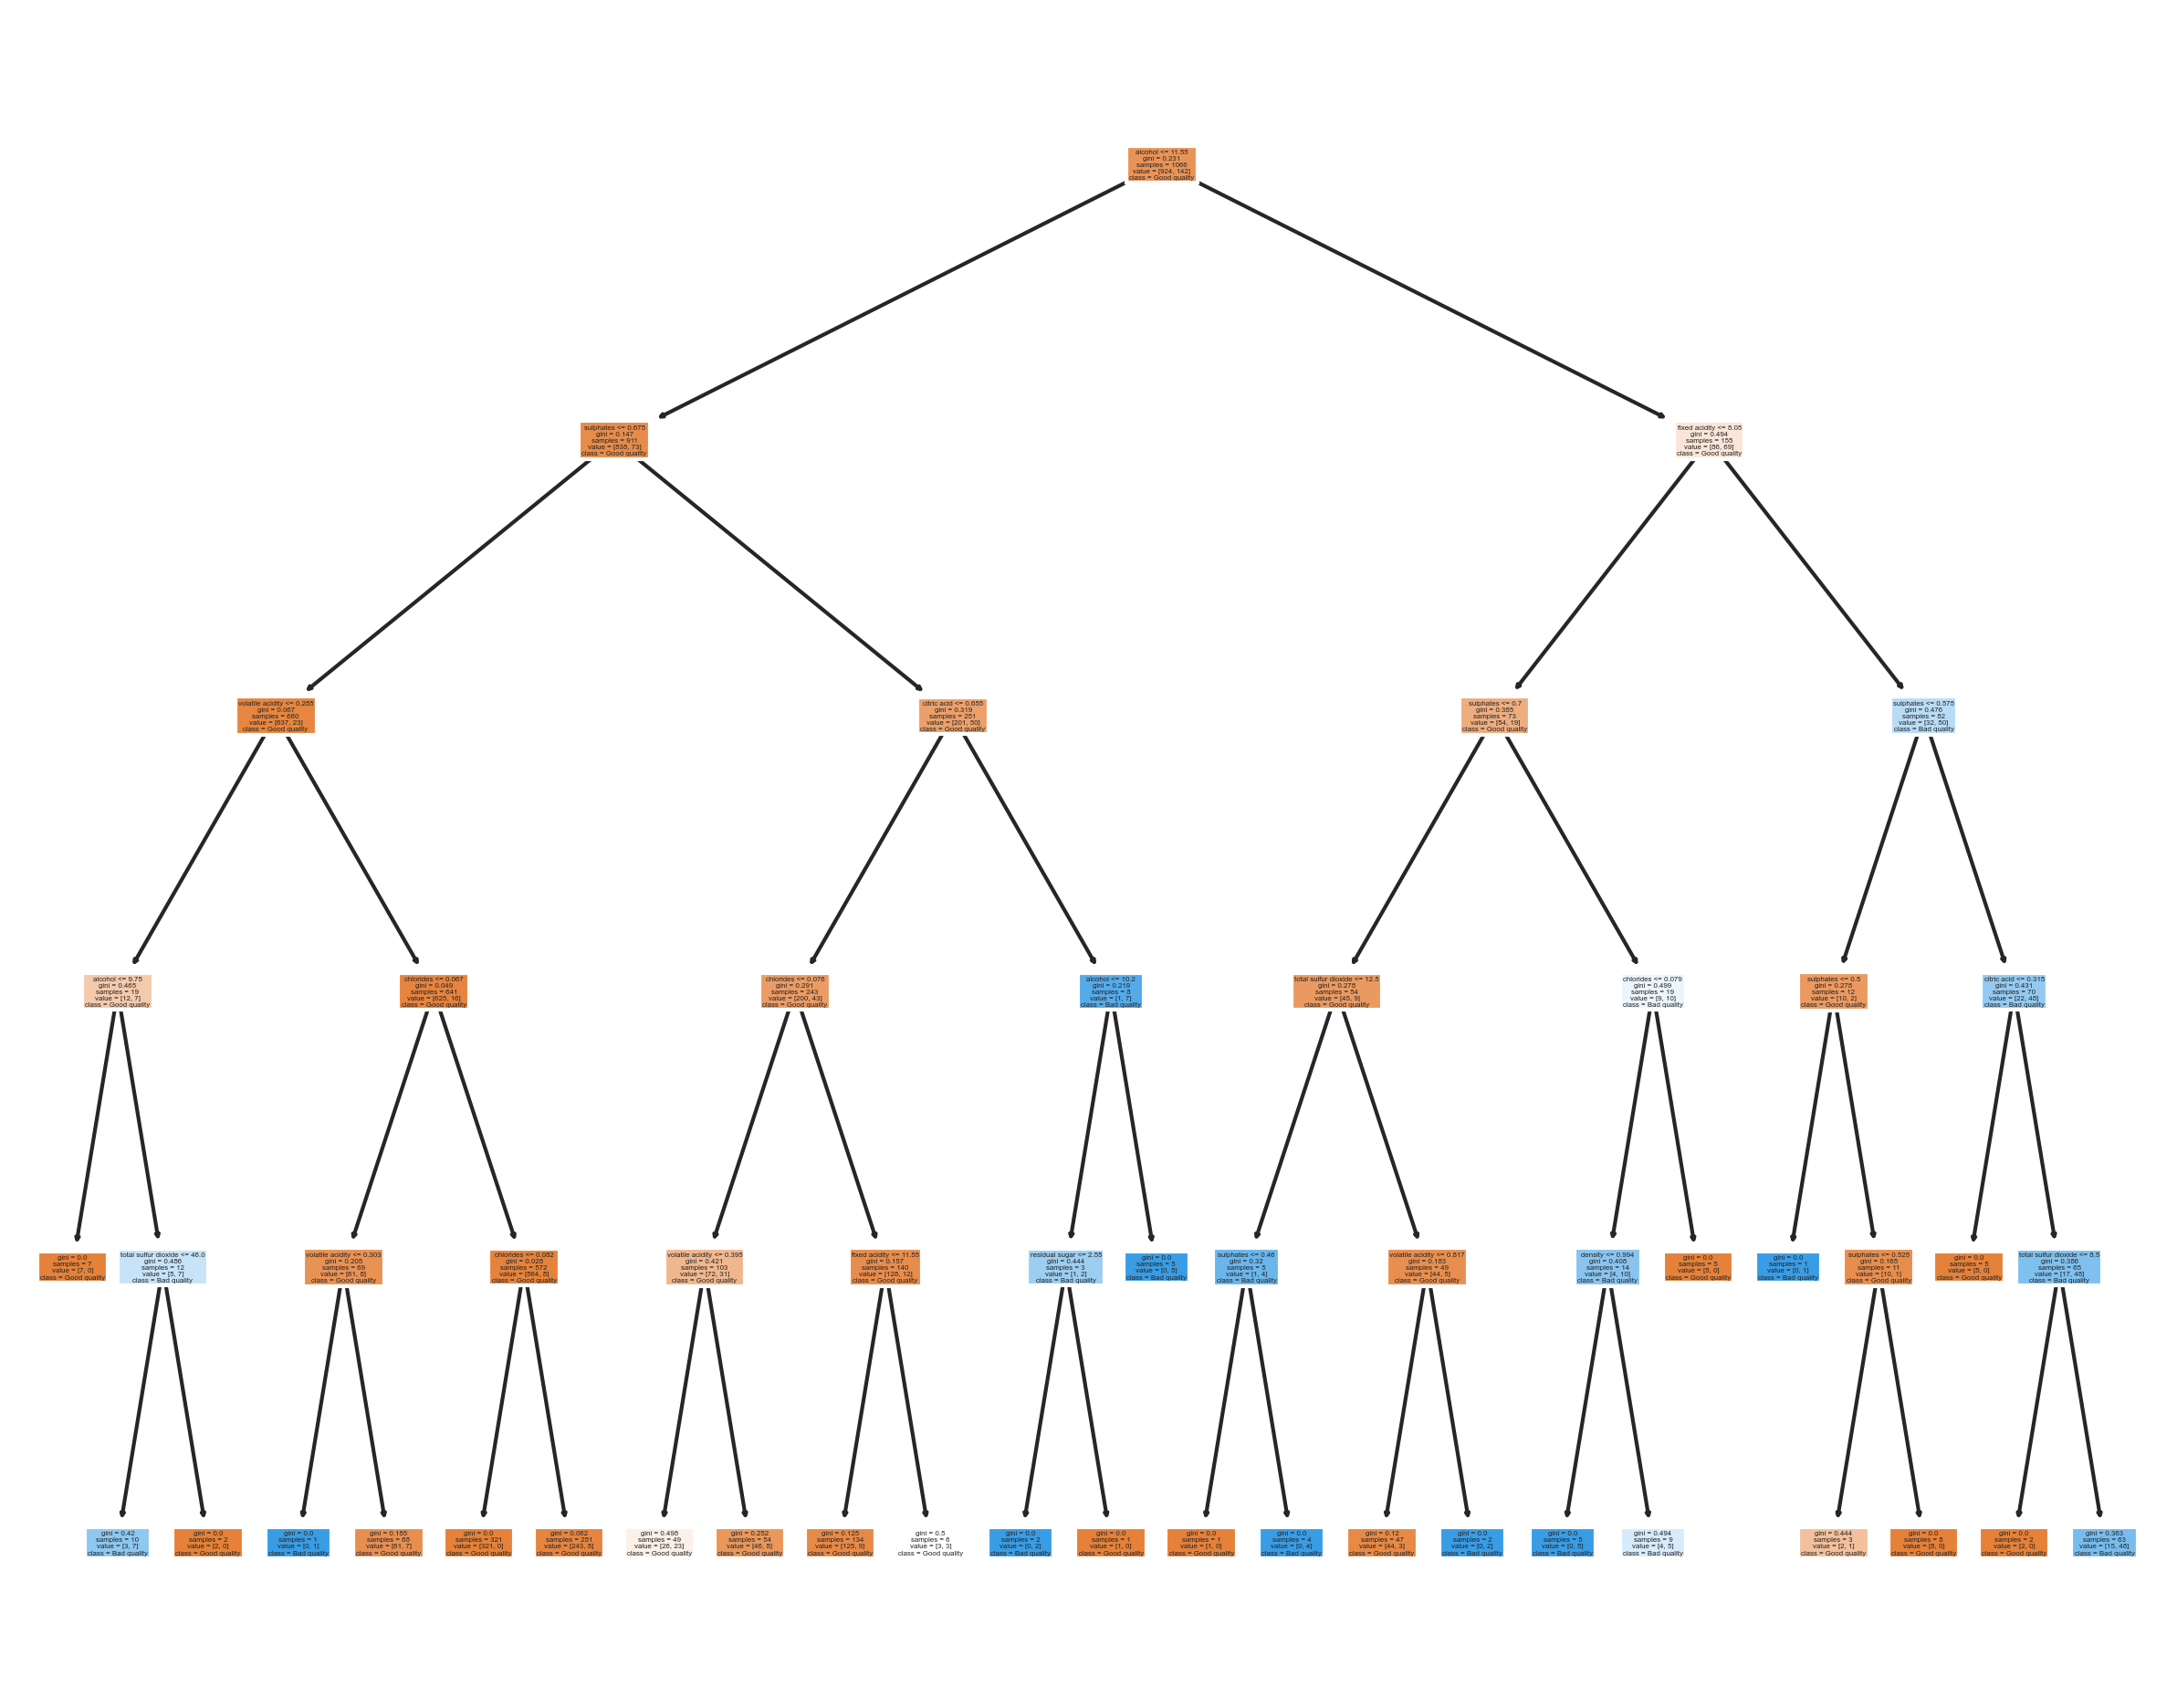

In [57]:
from sklearn import tree
df1=pd.DataFrame(wine.drop(['quality_new'],axis=1))
column_names=list(df1.columns)
fn=column_names
cn=['Good quality','Bad quality']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,8), dpi=300)

tree.plot_tree(model,
           feature_names = fn, 
           class_names=cn,
           filled = True);

fig.savefig('DecisionTree.png')

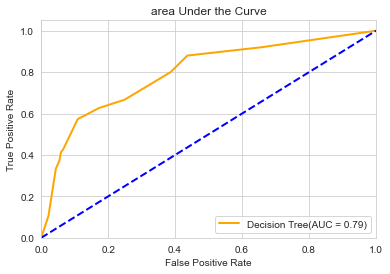

In [58]:
from sklearn.metrics import roc_curve, auc
#Plotting the AUROC curve

plt.figure(1)
lw=2
fpr_dt,tpr_dt,_=roc_curve(y_test,y_pred_proba)
roc_auc_dt = auc(fpr_dt,tpr_dt)
plt.plot(fpr_dt,tpr_dt,color='orange',lw=lw,label='Decision Tree(AUC = %0.2f)'%roc_auc_dt)
plt.plot([0,1],[0,1],color='blue',lw=lw,linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
plt.legend(loc="upper left")
plt.legend(loc="lower right")




#### With random state =42 and max_depth =5 the accuracy of DT is 87% and AUC is 79%. Lets try to change the max_depth =4.

In [59]:
model=DecisionTreeClassifier(random_state=42,max_depth=4)    #constraint

In [60]:
# fit the DecisionTreeClassifeir model on the train dataset

dt=model.fit(X_train,y_train)

#Predict the output variable value for the X test dataset

y_pred=dt.predict(X_test)

In [61]:
y_pred_proba = dt.predict_proba(X_test)[::,1]    #[0.25 to be labeled as 0, 0.75 to be labeld as 1]   

In [62]:
#Evaluation of the model
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[431,  27],
       [ 44,  31]], dtype=int64)

<AxesSubplot:>

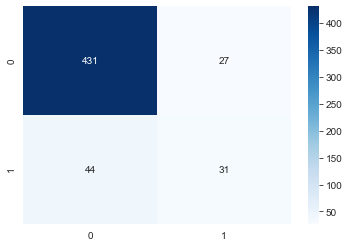

In [63]:
sns.heatmap(conf_matrix, annot = True, cmap="Blues", fmt='')

In [64]:
# classification: recall, precision, F1 score , Accuracy 

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       458
           1       0.53      0.41      0.47        75

    accuracy                           0.87       533
   macro avg       0.72      0.68      0.70       533
weighted avg       0.85      0.87      0.86       533



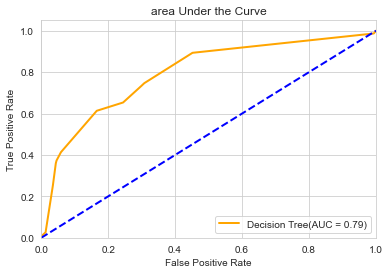

In [65]:
from sklearn.metrics import roc_curve, auc
#Plotting the AUROC curve

plt.figure(1)
lw=2
fpr_dt,tpr_dt,_=roc_curve(y_test,y_pred_proba)
roc_auc_dt = auc(fpr_dt,tpr_dt)
plt.plot(fpr_dt,tpr_dt,color='orange',lw=lw,label='Decision Tree(AUC = %0.2f)'%roc_auc_dt)
plt.plot([0,1],[0,1],color='blue',lw=lw,linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
# plt.legend(loc="upper left")
plt.legend(loc="lower right")


We can see from above that with the random state =42 and max_depth =4 the accuracy of our Decision tree model has stayed the same. In Decision tree, we have obtained the accuracy of 87% and AUC is 79%.


### Random Forest classifier
Random forests are an ensemble learning technique that builds off of decision trees. Random forests involve creating multiple decision trees using bootstrapped datasets of the original data and randomly selecting a subset of variables at each step of the decision tree. The model then selects the mode of all of the predictions of each decision tree. 

##### Import Random forest classifier and fit the data

In [67]:
from sklearn.ensemble import RandomForestClassifier 

Selecting the features and target variable for modelling. Splitting the dataset into train and test.

In [68]:
X = wine.drop('quality_new',axis=1)
y=wine['quality_new']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=32)

In [69]:
# Set the random state for reproducibility
fit_rf = RandomForestClassifier(random_state=42)

#### Random Forest Classifier model is finetuned by using GridSearchCV which makes use of the hyperparameters.

In [70]:
from sklearn.model_selection import GridSearchCV
#Providing random seed so that the same result is obtained everytime
np.random.seed(42)

# Providing the different values of hyperparameters
param_dist = {'max_depth': [2, 3, 4, 5],
              'max_features': ['auto', 'sqrt', 'log2', None],
                'bootstrap' : [True, False],
              'criterion': ['gini', 'entropy'],
             'n_estimators': [100, 200, 300, 1000]}

# Running gridsearchCV to check for all the different PnCs of these parameter values
cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = -1)

#Fitting the train set , so that grid search is executed on this dataset
cv_rf.fit(X_train,y_train)

#Printing the best parameters by using best_params
print('Best Parameters using grid search: \n', cv_rf.best_params_)

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 100}


#### Finally the best parameters are specified

In [71]:
fit_rf.set_params(criterion = 'gini',
                  max_features = 'auto', 
                  bootstrap = True,
                  max_depth = 5,
                  n_estimators= 100)


RandomForestClassifier(max_depth=5, random_state=42)

#### OOB rate: OOB_Score is a very powerful Validation Technique used especially for the Random Forest algorithm for least Variance results.
While using the cross-validation technique, every validation set has already been seen or used in training by a few decision trees and hence there is a leakage of data, therefore more variance.
But, OOB_Score prevents leakage and gives a better model with low variance, so we use OOB_score for validating the model. 
The OOB_score is computed as the number of correctly predicted rows from the out-of-bag sample.
and OOB Error is the number of wrongly classifying the OOB Sample.
The aim of this entire process is to check for how many Decision Trees does the OOB error rate comes least & is stable too!

In [72]:
# Working on the OOB rate, OOB rate by default is 'FALSE'

fit_rf.set_params(oob_score=True)

min_estimators = 10
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1,5):
    fit_rf.set_params(n_estimators=i)       #specifying the number of extimators or DTs
    fit_rf.fit(X_train,y_train)     #fit to the train dataset

    oob_error = 1 - fit_rf.oob_score_      #oob_score_ gives prediction score, subtract from 1 to find error
    error_rate[i] = oob_error

In [73]:
# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)
oob_series

10      0.121013
15      0.117261
20      0.115385
25      0.121013
30      0.119137
          ...   
980     0.112570
985     0.112570
990     0.112570
995     0.112570
1000    0.112570
Length: 199, dtype: float64

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes (From 15 to 1000 trees)')

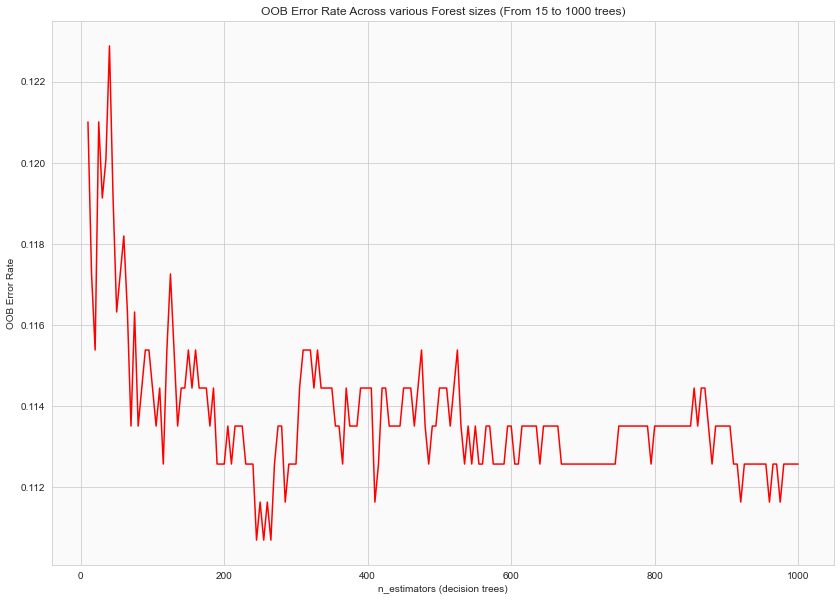

In [74]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
#plt.axhline(0.042, color='#875FDB',linestyle='--')
#plt.axhline(0.037, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators (decision trees)')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes (From 15 to 1000 trees)')

In [102]:
print('OOB Error rate for 650 trees is: {0:.5f}'.format(oob_series[650]))

OOB Error rate for 650 trees is: 0.11351


####  Refine the tree via OOB Output

In [76]:
fit_rf.set_params(n_estimators=650,
                  bootstrap = True,
                  oob_score=False)

RandomForestClassifier(max_depth=5, n_estimators=650, random_state=42)

#### Fitting the model to training dataset

In [77]:
fit_rf.fit(X_train, y_train)
pred_rf = fit_rf.predict(X_test)
y_pred_proba = fit_rf.predict_proba(X_test)[::,1]    #[0.25 to be labeled as 0, 0.75 to be labeld as 1]   

#### Confusion Matrix

In [78]:
confusion_matrix(y_test,pred_rf)

array([[449,   9],
       [ 55,  20]], dtype=int64)

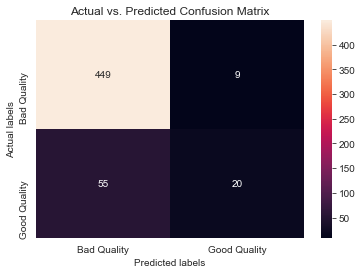

In [79]:
cm=confusion_matrix(y_test,pred_rf)
ax= plt.subplot()
sns.heatmap(cm,annot=True, ax= ax, fmt='')

ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_title('Actual vs. Predicted Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Bad Quality','Good Quality']); ax.yaxis.set_ticklabels(['Bad Quality','Good Quality']);

plt.show()

In [80]:
# classification: recall, precision, F1 score , Accuracy 
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       458
           1       0.69      0.27      0.38        75

    accuracy                           0.88       533
   macro avg       0.79      0.62      0.66       533
weighted avg       0.86      0.88      0.86       533



#### Evaluation Metrics

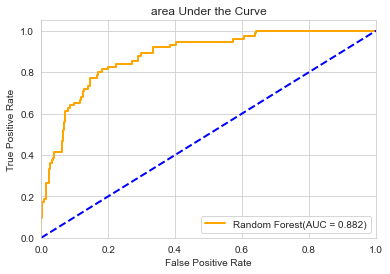

In [81]:
from sklearn.metrics import roc_curve, auc
#Plotting the AUROC curve

plt.figure(1)
lw=2
fpr_dt,tpr_dt,_=roc_curve(y_test,y_pred_proba)
roc_auc_dt = auc(fpr_dt,tpr_dt)
plt.plot(fpr_dt,tpr_dt,color='orange',lw=lw,label='Random Forest(AUC = %0.3f)'%roc_auc_dt)
plt.plot([0,1],[0,1],color='blue',lw=lw,linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
# plt.legend(loc="upper left")
plt.legend(loc="lower right")



#### With Random Forest classifier the accuracy of model is 88% and AUC is also 88%.

In [83]:
rf_best = cv_rf.best_estimator_
rf_best

RandomForestClassifier(max_depth=5, random_state=42)

In [84]:
rf_best.feature_importances_

array([0.07841341, 0.12750235, 0.11206391, 0.03282892, 0.06661831,
       0.07532424, 0.06707228, 0.0482118 , 0.13820387, 0.25376092])

In [85]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})
imp_df
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
9,alcohol,0.253761
8,sulphates,0.138204
1,volatile acidity,0.127502
2,citric acid,0.112064
0,fixed acidity,0.078413
5,total sulfur dioxide,0.075324
6,density,0.067072
4,chlorides,0.066618
7,pH,0.048212
3,residual sugar,0.032829


In [ ]:
By looking into the details, we can see that good quality wines have higher levels of alcohol on average, have a lower volatile acidity on average, higher levels of sulphates on average, and higher levels of residual sugar on average.

### KNN algorithm

In [86]:
from sklearn.neighbors import KNeighborsClassifier

#### KNN model is distance based, hence scaling of features is very important. X is a dataframe that contains all the features which are scaled and y contains target variable.

In [87]:
X=wine_feat
y=wine['quality_new']
X.head()
y.head()

0    0
1    0
2    0
3    0
4    0
Name: quality_new, dtype: int64

#### Train test split

In [88]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=32)

In [89]:
knn = KNeighborsClassifier(n_neighbors=3)    #Instantiate
knn.fit(X_train,y_train)                     #make sure to scale the independent variables , then split the dataset. and then 
                                                #fit onto x_train scaled
pred = knn.predict(X_test)                   #Predict

##### Predictions and Evaluations

In [90]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[416  42]
 [ 51  24]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       458
           1       0.36      0.32      0.34        75

    accuracy                           0.83       533
   macro avg       0.63      0.61      0.62       533
weighted avg       0.82      0.83      0.82       533



In [91]:
from sklearn.model_selection import cross_val_score
accuracy_rate = []
for i in range(1,40):    # May take some time
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,wine_feat,wine['quality_new'],cv=10)
    accuracy_rate.append(score.mean())
    
#For different number of neighbors the model is run several times using FOR loop
# cross_val_score returns the accuracy score of all the 10 validations done since cv = 10
# In the Accuracy list the mean of all 10 scores is stored.

#Hence we have the mean accuracy score for each iteration.

Text(0, 0.5, 'Accuracy Rate')

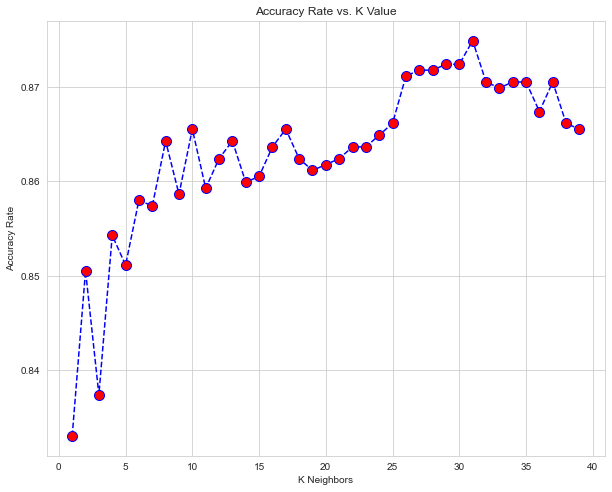

In [92]:
#Plotting the mean accuracy socre against all the K values

plt.figure(figsize = (10,8))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K Neighbors')
plt.ylabel('Accuracy Rate')

In [93]:
#Finally using the optimum value of K = 28

knn = KNeighborsClassifier(n_neighbors=28)    #Instantiate
knn.fit(X_train,y_train)                     #fit
pred = knn.predict(X_test)                   #Predict

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[446  12]
 [ 57  18]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       458
           1       0.60      0.24      0.34        75

    accuracy                           0.87       533
   macro avg       0.74      0.61      0.64       533
weighted avg       0.85      0.87      0.85       533



In [94]:
y_pred_proba = knn.predict_proba(X_test)[::,1] 

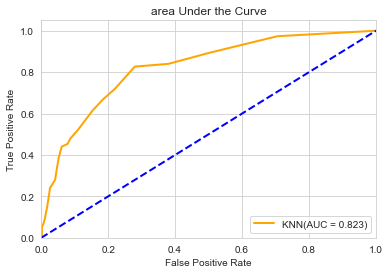

In [95]:
#Finally finding the AUROC Curve

from sklearn.metrics import roc_curve, auc
#Plotting the AUROC curve

plt.figure(1)
lw=2
fpr_dt,tpr_dt,_=roc_curve(y_test,y_pred_proba)
roc_auc_dt = auc(fpr_dt,tpr_dt)
plt.plot(fpr_dt,tpr_dt,color='orange',lw=lw,label='KNN(AUC = %0.3f)'%roc_auc_dt)
plt.plot([0,1],[0,1],color='blue',lw=lw,linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
# plt.legend(loc="upper left")
plt.legend(loc="lower right")




For KNN model the accuracy is 87% and AUC is 82%.

### Summary
#### Comparison of all the 4 models:

In [96]:
####comparing the models
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#import Random forest classifier and fit the data
from sklearn.ensemble import RandomForestClassifier 

# logistic regression
model1 = LogisticRegression()
#Decision tree
model2=DecisionTreeClassifier(random_state=42,max_depth=4)    #constraint
#Random forest
model3 = RandomForestClassifier(random_state=42)
##knn
model4 = KNeighborsClassifier(n_neighbors=28)
# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train,y_train)
model4.fit(X_train,y_train)


# predict probabilities
pred_prob1 = model1.predict_proba(X_test)[::,1]
pred_prob2 = model2.predict_proba(X_test)[::,1]
pred_prob3 = model3.predict_proba(X_test)[::,1]
pred_prob4 = model4.predict_proba(X_test)[::,1]

In [97]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3, pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4, pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


In [98]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1)
auc_score2 = roc_auc_score(y_test, pred_prob2)
auc_score3 = roc_auc_score(y_test, pred_prob3)
auc_score4 = roc_auc_score(y_test, pred_prob4)

print('AUC score for Logistic Regression is:' , auc_score1)
print('AUC score for Decision tree is:' , auc_score2)
print('AUC score for Random Forest is:' , auc_score3) 
print('AUC score for KNN is:' , auc_score4) 

AUC score for Logistic Regression is: 0.8621542940320234
AUC score for Decision tree is: 0.7945705967976711
AUC score for Random Forest is: 0.8976128093158662
AUC score for KNN is: 0.8227802037845706


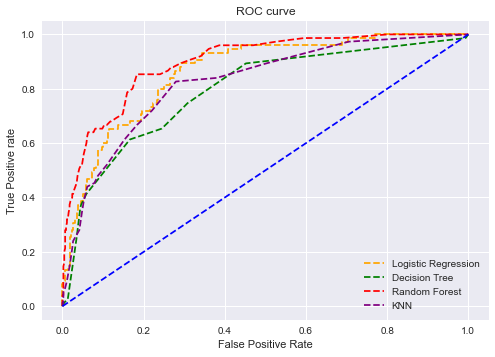

In [99]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Decision Tree')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Random Forest')
plt.plot(fpr4, tpr4, linestyle='--',color='purple', label='KNN')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

There are a couple things that we can observe from the above figure:
1. A model that randomly guesses the label will result in the blue line. 
2. If the model that we are working on has a curve above this blue line, then its a better model.
3. An ROC that is farther away from the blue line is better, so Random Forest here (red) seems the best than the other models.  Second best model is Logistic Regression (orange) followed by KNN (purple) and then Decision tree (green).

To analyse the performance we used Area under the curve (AUC) metric.  The area under the curve for the RF model
(AUC = 0.897) is better than the LR (AUC = 0.862),the KNN(0.822) and the DT (AUC=0.794).
